# ANÁLISIS BÁSICOS PARA POZO Y

En este proyecto se analizará la distribucción de las propiedades petrofísicas básicas como porosidad, permeabilidad y densidad de Grano para un grupo de muestras del Pozo Y, medidas mediante pruebas de laboratorio para plugs de 1.5"

In [95]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns


En la siguiente sección se explorará la data a trabajar y se manipulará para trabajar de forma adecuada

In [96]:
basicos_pozo_y=pd.read_csv("Básicos Pozo Y.csv", delimiter=";")

In [97]:
basicos_pozo_y.columns

Index(['Profundidad', 'Unnamed: 1', 'Densidad', 'Porosidad', 'K @ NMS',
       'Unnamed: 5', 'Porosidad.1', 'K aire'],
      dtype='object')

In [98]:
basicos_pozo_y.columns=['Profundidad (ft)', 'Profundidad (m)', 'Densidad de Granos (g/cc)', 'Porosidad @ NMS (%)', 'K @ NMS (md)',
       'K @ NMS (mm2)', 'Porosidad Conv. (%)', 'K aire (md)']

In [99]:

basicos_pozo_y=basicos_pozo_y.drop([0],axis=0)
basicos_pozo_y=basicos_pozo_y.reset_index(drop=True)

In [100]:
basicos_pozo_y.dtypes

Profundidad (ft)             object
Profundidad (m)              object
Densidad de Granos (g/cc)    object
Porosidad @ NMS (%)          object
K @ NMS (md)                 object
K @ NMS (mm2)                object
Porosidad Conv. (%)          object
K aire (md)                  object
dtype: object

In [101]:
basicos_pozo_y=basicos_pozo_y.astype({'Profundidad (ft)':'float64', 'Profundidad (m)':'float64', 'Densidad de Granos (g/cc)':'float64','Porosidad @ NMS (%)':'float64',
                                      'K @ NMS (md)':'float64','K @ NMS (mm2)':'float64','Porosidad Conv. (%)':'float64','K aire (md)':'float64' })

In [102]:
basicos_pozo_y.dtypes

Profundidad (ft)             float64
Profundidad (m)              float64
Densidad de Granos (g/cc)    float64
Porosidad @ NMS (%)          float64
K @ NMS (md)                 float64
K @ NMS (mm2)                float64
Porosidad Conv. (%)          float64
K aire (md)                  float64
dtype: object

In [103]:
basicos_pozo_y

,Profundidad (ft),Profundidad (m),Densidad de Granos (g/cc),Porosidad @ NMS (%),K @ NMS (md),K @ NMS (mm2),Porosidad Conv. (%),K aire (md)
0,6240.6,1529.66928,2.656,16.235088,0.429437,0.000424,19.749489,3.006972
1,6242.3,1530.18744,2.632,15.893197,0.761182,0.000751,20.136478,7.583013
2,6243.5,1530.55320,2.653,19.499840,9.574795,0.009450,22.088410,16.434356
3,6244.7,1530.91896,2.650,23.674374,80.795960,0.079739,26.505995,105.322492
4,6245.3,1531.10184,2.640,21.641582,23.647195,0.023338,24.580986,38.574176
...,...,...,...,...,...,...,...,...
62,6346.3,1561.88664,2.630,25.464635,104.697952,0.103329,29.458644,174.643733
63,6347.6,1562.28288,2.603,22.510021,65.254513,0.064401,27.024437,121.523663
64,6348.2,1562.46576,2.630,25.131449,306.170579,0.302167,29.785017,451.892448
65,6351.3,1563.41064,2.629,27.061615,492.056365,0.485622,31.716626,631.007255


In [104]:
# Se utiliza un bucle while para dar ciertas reglas para cantidad de cifras decimales para la permeabilidad
i=0
teta=[]       
max_index = len(basicos_pozo_y['Profundidad (ft)'])

while i < max_index:
    if basicos_pozo_y.iloc[i,4]>=10:
        teta.append(int(basicos_pozo_y.iloc[i,4]))  
        i=i+1
    elif (basicos_pozo_y.iloc[i,4]>1) & (basicos_pozo_y.iloc[i,4]<10):
        teta.append(round(basicos_pozo_y.iloc[i,4],1))
        i=i+1
    elif (basicos_pozo_y.iloc[i,4]<1):
#         teta.append(np.format_float_scientific(basicos_pozo_y.iloc[i,4], precision = 2, exp_digits=3))
        teta.append(format(basicos_pozo_y.iloc[i,4],'.1E'))
        i=i+1
#         format(no1,'.1E')
 
i=0
peta=[]       
max_index = len(basicos_pozo_y['Profundidad (ft)'])

while i < max_index:
    if basicos_pozo_y.iloc[i,5]>=10:
        peta.append(int(basicos_pozo_y.iloc[i,5]))  
        i=i+1
    elif (basicos_pozo_y.iloc[i,5]>1) & (basicos_pozo_y.iloc[i,5]<10):
        peta.append(round(basicos_pozo_y.iloc[i,5],1))
        i=i+1
    elif (basicos_pozo_y.iloc[i,5]<1):
        peta.append(np.format_float_scientific(basicos_pozo_y.iloc[i,5], precision = 2, exp_digits=3))
        i=i+1

i=0
ñeta=[]
max_index = len(basicos_pozo_y['Profundidad (ft)'])

while i < max_index :
    if basicos_pozo_y.iloc[i,7]>=10:
        ñeta.append(int(basicos_pozo_y.iloc[i,7]))
        i=i+1
    elif (basicos_pozo_y.iloc[i,7]>1) & (basicos_pozo_y.iloc[i,7]<10):
        ñeta.append(round(basicos_pozo_y.iloc[1,7],1))
        i=i+1
    elif basicos_pozo_y.iloc[i,7] < 1:
        ñeta.append(np.format_float_scientific(basicos_pozo_y.iloc[i,7], precision=2, exp_digits=3))
        i=i+1


alpha=[]     
        
for x in basicos_pozo_y['Porosidad @ NMS (%)']:
    alpha.append((round(x,1)))
    
    
beta=[]
for x in basicos_pozo_y['Profundidad (m)']:
    beta.append((round(x,1)))


neta=[]     
        
for x in basicos_pozo_y['Porosidad Conv. (%)']:
    neta.append((round(x,1)))

    
    


In [105]:
basicos_pozo_y['K @ NMS (md)']=teta
basicos_pozo_y[	'K @ NMS (mm2)']=peta
basicos_pozo_y['Porosidad @ NMS (%)']=alpha
basicos_pozo_y['Profundidad (m)']=beta
basicos_pozo_y['Porosidad Conv. (%)']=neta
basicos_pozo_y['K aire (md)']=ñeta
basicos_pozo_y['K @ NMS (md)'].dtypes
    

dtype('O')

In [106]:
basicos_pozo_y

,Profundidad (ft),Profundidad (m),Densidad de Granos (g/cc),Porosidad @ NMS (%),K @ NMS (md),K @ NMS (mm2),Porosidad Conv. (%),K aire (md)
0,6240.6,1529.7,2.656,16.2,4.3E-01,4.24e-004,19.7,7.6
1,6242.3,1530.2,2.632,15.9,7.6E-01,7.51e-004,20.1,7.6
2,6243.5,1530.6,2.653,19.5,9.6,9.45e-003,22.1,16
3,6244.7,1530.9,2.650,23.7,80,7.97e-002,26.5,105
4,6245.3,1531.1,2.640,21.6,23,2.33e-002,24.6,38
...,...,...,...,...,...,...,...,...
62,6346.3,1561.9,2.630,25.5,104,1.03e-001,29.5,174
63,6347.6,1562.3,2.603,22.5,65,6.44e-002,27.0,121
64,6348.2,1562.5,2.630,25.1,306,3.02e-001,29.8,451
65,6351.3,1563.4,2.629,27.1,492,4.86e-001,31.7,631


## Resumen de Estadístico

In [107]:
basicos_pozo_y['K @ NMS (md)']=basicos_pozo_y['K @ NMS (md)'].astype('float64')

basicos_pozo_y.dtypes

Profundidad (ft)             float64
Profundidad (m)              float64
Densidad de Granos (g/cc)    float64
Porosidad @ NMS (%)          float64
K @ NMS (md)                 float64
K @ NMS (mm2)                 object
Porosidad Conv. (%)          float64
K aire (md)                   object
dtype: object

In [108]:

porosidad=round(basicos_pozo_y[['Porosidad @ NMS (%)']].agg([min,max,np.median,np.mean,np.std]),2)
porosidad

,Porosidad @ NMS (%)
min,4.70
max,29.80
median,23.30
mean,21.26
std,6.33


In [109]:

d_g=round(basicos_pozo_y[['Densidad de Granos (g/cc)']].agg([len,min,max,np.median,np.mean,np.std]),3)
d_g

,Densidad de Granos (g/cc)
len,67.000
min,2.603
max,2.671
median,2.640
mean,2.642
std,0.014


In [110]:

perm=round(basicos_pozo_y[['K @ NMS (md)']].agg([len,min ,max,np.median,np.mean,np.std]),3)
perm


,K @ NMS (md)
len,67.000
min,0.002
max,2025.000
median,71.000
mean,222.600
std,402.776


## FUNCIÓN TABLA DE FRECUENCIAS PARA DENSIDAD DE GRANO, PERMEABILIDAD Y POROSIDAD 

Definimos una función para automatizar la realización de tablas de frecuencias según la Densidad de Grano, Porosidad y Permeabilidad. Los datos de entrada necesarios para nuestra función son el DataFrame, la columna a analizar, los intervalos de división para nuestra tabla, y como cantidad de cifras decimales, y nuestra variable vari que será la propiedad para la cual queremos realizar el análsiis ("Porosidad", "Permeabilidad", "Densidad") 

In [111]:
def frecuencia (df, colname,intervalos=10,y=2,vari=True):
    """ Función que arroja una tabla de frecuencias para valores agrupados en intervalos, la función
        tiene com entradas obligatorias df(tabala a analizar) y colname(columna para revisar su frecuencia), las entradas x, y"""                        
    
    #inicamos un array de zeros 
    datos=np.zeros((intervalos,7))
#     covertimos el array a una tabla
    frecuencias=pd.DataFrame(datos, columns=["LimInf", "LimSup","Intervalo","Frecuencia","Frecuencia Acum.","%Frecuencia","%Frecuencia Acum."])
#     Extraer la columna del DataFrame
    col=df[colname]
    
    
    if vari=="Porosidad":
        a=(round(((round(max(df[colname]),y))-round(min(df[colname]),y))/intervalos,y))
        amplitud=math.ceil(a)
        por=math.floor(min(df[colname]))
    elif vari=="Permeabilidad":
        frecuencias.iloc[0,0]=0
        frecuencias.iloc[0,1]= 1e-4
        frecuencias.iloc[1,0]=1e-4
        frecuencias.iloc[1,1]=1e-3
        frecuencias.iloc[2,0]=1e-3
        frecuencias.iloc[2,1]=1e-2
        frecuencias.iloc[3,0]=1e-2
        frecuencias.iloc[3,1]=1e-1
        frecuencias.iloc[4,0]=1e-1
        frecuencias.iloc[4,1]=1
        frecuencias.iloc[5,0]=1
        frecuencias.iloc[5,1]=1e+1
        frecuencias.iloc[6,0]=1e+1
        frecuencias.iloc[6,1]=1e+2
        frecuencias.iloc[7,0]=1e+2
        frecuencias.iloc[7,1]=1e+3
        frecuencias.iloc[8,0]=1e+3
        frecuencias.iloc[8,1]=1e+4
        frecuencias.iloc[9,0]=1e+4
        frecuencias.iloc[9,1]=1e+5
        
        for i in range(1,frecuencias.shape[0]):
             frecuencias.iloc[i,2]=(f"{(frecuencias.iloc[i,0])} - {(frecuencias.iloc[i,1])}")    
        
    else:
        amplitud=(round(((round(max(df[colname]),y))-round(min(df[colname]),y))/intervalos,y))
        por=round(min(df[colname]),y)
                
    
    
    if vari!="Permeabilidad":
        frecuencias.iloc[0,1]=por
        frecuencias.iloc[0,2]=(f"<{round(frecuencias.iloc[0,1],y)}")
        for i in range(1,frecuencias.shape[0]):
            frecuencias.iloc[i,0]= round(frecuencias.iloc[i-1,1],y)
            frecuencias.iloc[i,1]=round(frecuencias.iloc[i,0]+amplitud,y)
            frecuencias.iloc[i,2]=(f"{round(frecuencias.iloc[i,0],y)} - {round(frecuencias.iloc[i,1],y)}")
    
    
    for x in df[colname]:
        for i in range(0,frecuencias.shape[0]):
            if (x>frecuencias.iloc[i,0]) & (x<=frecuencias.iloc[i,1]):
                frecuencias.iloc[i,3]+=1
    
    frecuencias.iloc[0,4]=frecuencias.iloc[0,3]
    
    for i in range(1,frecuencias.shape[0]):
        frecuencias.iloc[i,4]=frecuencias.iloc[i,3]+frecuencias.iloc[i-1,4]
        frecuencias.iloc[i,5]=round(((frecuencias.iloc[i,3]/len(df[colname]))*100),0)
        frecuencias.iloc[i,6]=round(((frecuencias.iloc[i,4]/len(df[colname]))*100),0)
    
  
    return frecuencias







## TABLA DE FRECUENCIAS POROSIDAD     


In [112]:
Porosidad= frecuencia(basicos_pozo_y,'Porosidad @ NMS (%)',vari='Porosidad', intervalos=11)
Porosidad
Porosidad['p']=[1,2,3,4,5,6,7,8,9,10,11]
Porosidad

,LimInf,LimSup,Intervalo,Frecuencia,Frecuencia Acum.,%Frecuencia,%Frecuencia Acum.,p
0,0.0,4.0,<4.0,0.0,0.0,0.0,0.0,1
1,4.0,7.0,4.0 - 7.0,1.0,1.0,1.0,1.0,2
2,7.0,10.0,7.0 - 10.0,7.0,8.0,10.0,12.0,3
3,10.0,13.0,10.0 - 13.0,4.0,12.0,6.0,18.0,4
4,13.0,16.0,13.0 - 16.0,1.0,13.0,1.0,19.0,5
5,16.0,19.0,16.0 - 19.0,2.0,15.0,3.0,22.0,6
6,19.0,22.0,19.0 - 22.0,5.0,20.0,7.0,30.0,7
7,22.0,25.0,22.0 - 25.0,26.0,46.0,39.0,69.0,8
8,25.0,28.0,25.0 - 28.0,17.0,63.0,25.0,94.0,9
9,28.0,31.0,28.0 - 31.0,4.0,67.0,6.0,100.0,10


## TABLA DE FRECUENCIAS DENISDAD DE GRANO

In [113]:
Densidad= frecuencia(basicos_pozo_y,'Densidad de Granos (g/cc)',vari='Densidad', intervalos=10)
Densidad

,LimInf,LimSup,Intervalo,Frecuencia,Frecuencia Acum.,%Frecuencia,%Frecuencia Acum.
0,0.00,2.60,<2.6,0.0,0.0,0.0,0.0
1,2.60,2.61,2.6 - 2.61,1.0,1.0,1.0,1.0
2,2.61,2.62,2.61 - 2.62,2.0,3.0,3.0,4.0
3,2.62,2.63,2.62 - 2.63,8.0,11.0,12.0,16.0
4,2.63,2.64,2.63 - 2.64,26.0,37.0,39.0,55.0
5,2.64,2.65,2.64 - 2.65,10.0,47.0,15.0,70.0
6,2.65,2.66,2.65 - 2.66,15.0,62.0,22.0,93.0
7,2.66,2.67,2.66 - 2.67,4.0,66.0,6.0,99.0
8,2.67,2.68,2.67 - 2.68,1.0,67.0,1.0,100.0
9,2.68,2.69,2.68 - 2.69,0.0,67.0,0.0,100.0


## Tabla Frecuencias Permeabilidad

In [114]:
Permeabilidad= frecuencia(basicos_pozo_y,'K @ NMS (md)',vari='Permeabilidad', intervalos=10)
Permeabilidad=Permeabilidad.drop(index=9, axis=0)
Permeabilidad


,LimInf,LimSup,Intervalo,Frecuencia,Frecuencia Acum.,%Frecuencia,%Frecuencia Acum.
0,0.0000,0.0001,0,0.0,0.0,0.0,0.0
1,0.0001,0.0010,0.0001 - 0.001,0.0,0.0,0.0,0.0
2,0.0010,0.0100,0.001 - 0.01,6.0,6.0,9.0,9.0
3,0.0100,0.1000,0.01 - 0.1,5.0,11.0,7.0,16.0
4,0.1000,1.0000,0.1 - 1.0,4.0,15.0,6.0,22.0
5,1.0000,10.0000,1.0 - 10.0,1.0,16.0,1.0,24.0
6,10.0000,100.0000,10.0 - 100.0,24.0,40.0,36.0,60.0
7,100.0000,1000.0000,100.0 - 1000.0,22.0,62.0,33.0,93.0
8,1000.0000,10000.0000,1000.0 - 10000.0,5.0,67.0,7.0,100.0


## DISTRIBUCCIONES DE FRECUENCIAS

### GRAFICOS DISTRIBUCCIÓN POROSIDAD

<ipython-input-115-6ee88267378d>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels([0,20,40,60,80,100],rotation = 0, size = 30)


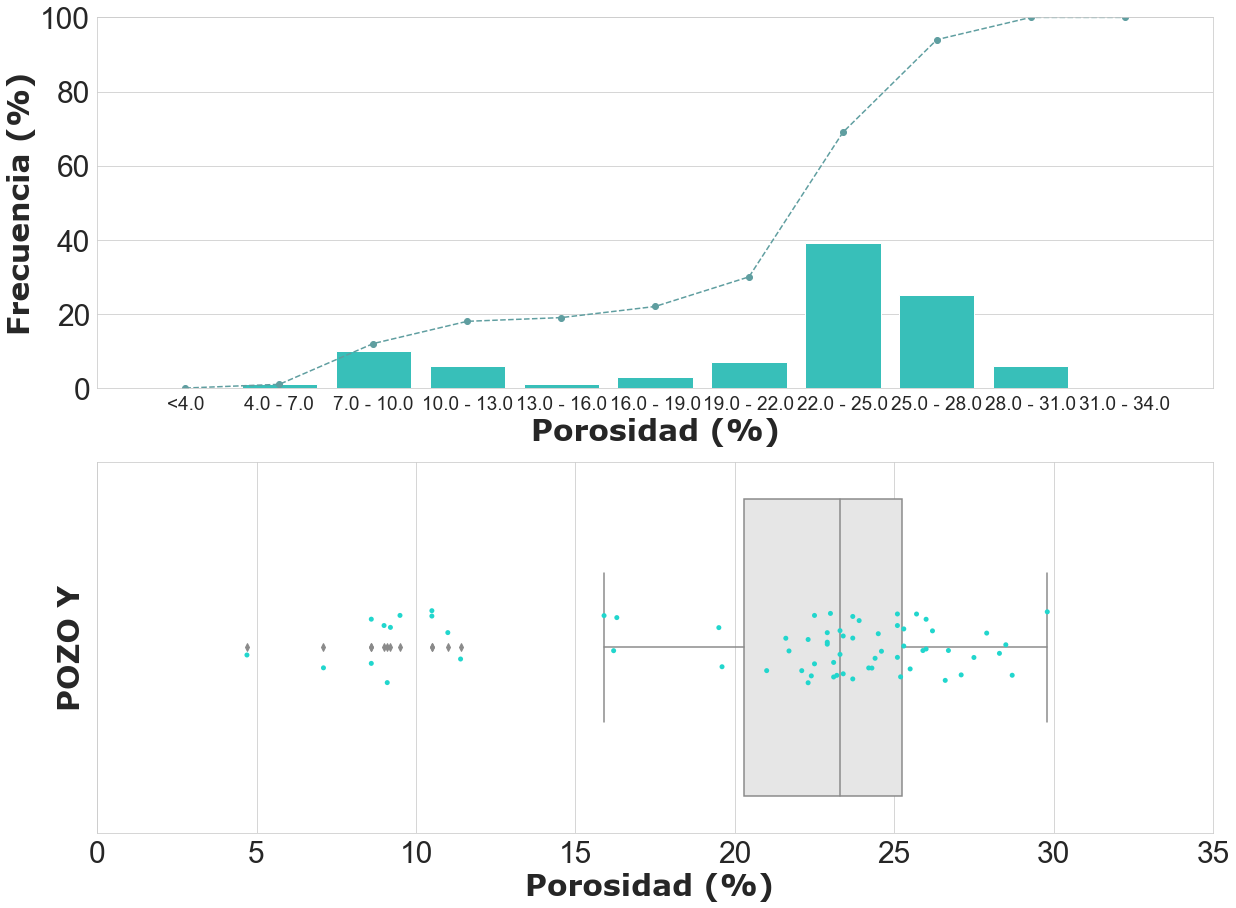

In [115]:
list_of_single_column = Porosidad.Intervalo.tolist()
list_of_single_column
fig, axes=plt.subplots(2,1,figsize=(20,15))

#Grafico para porosidad
sns.set_style("whitegrid")




sns.barplot(x = 'Intervalo', y = '%Frecuencia',data = Porosidad,ax=axes[0], color=("#21d6cd"))

# axes[0].set_title("Porosidad (%)",fontsize=30, y=1.03, fontfamily='verdana',fontweight ='bold', x=1.1)
axes[0].set_xlabel("Porosidad (%)",fontsize=30, fontfamily='verdana',fontweight ='bold')
axes[0].set_ylabel("Frecuencia (%)",fontsize=30,fontfamily='verdana',fontweight ='bold' )
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 0,size = 19)
axes[0].set_ylim(0,100)



axes[0].set_yticklabels([0,20,40,60,80,100],rotation = 0, size = 30)



axes[0].plot('%Frecuencia Acum.',data = Porosidad,linestyle="--", marker="o", color='cadetblue')

plt.ylim(0,100)

sns.boxplot(x='Porosidad @ NMS (%)',data=basicos_pozo_y, ax=axes[1],color=".9")
sns.stripplot(data=basicos_pozo_y, x='Porosidad @ NMS (%)', ax=axes[1], color="#21d6cd")
axes[1].set_xlabel("Porosidad (%) ",fontsize=30, fontfamily='verdana',fontweight ='bold')
axes[1].set_ylabel("POZO Y",fontsize=30, fontfamily='verdana',fontweight ='bold' )
axes[1].set_xlim(0,35)


plt.xticks(size=30)
plt.savefig('Porosidad_POZO_Y.png')

plt.show()
    

### GRAFICOS DISTRIBUCCIÓN PERMEABILIDAD

<ipython-input-116-66f565065509>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels([0,20,40,60,80,100],rotation = 0, size = 30)


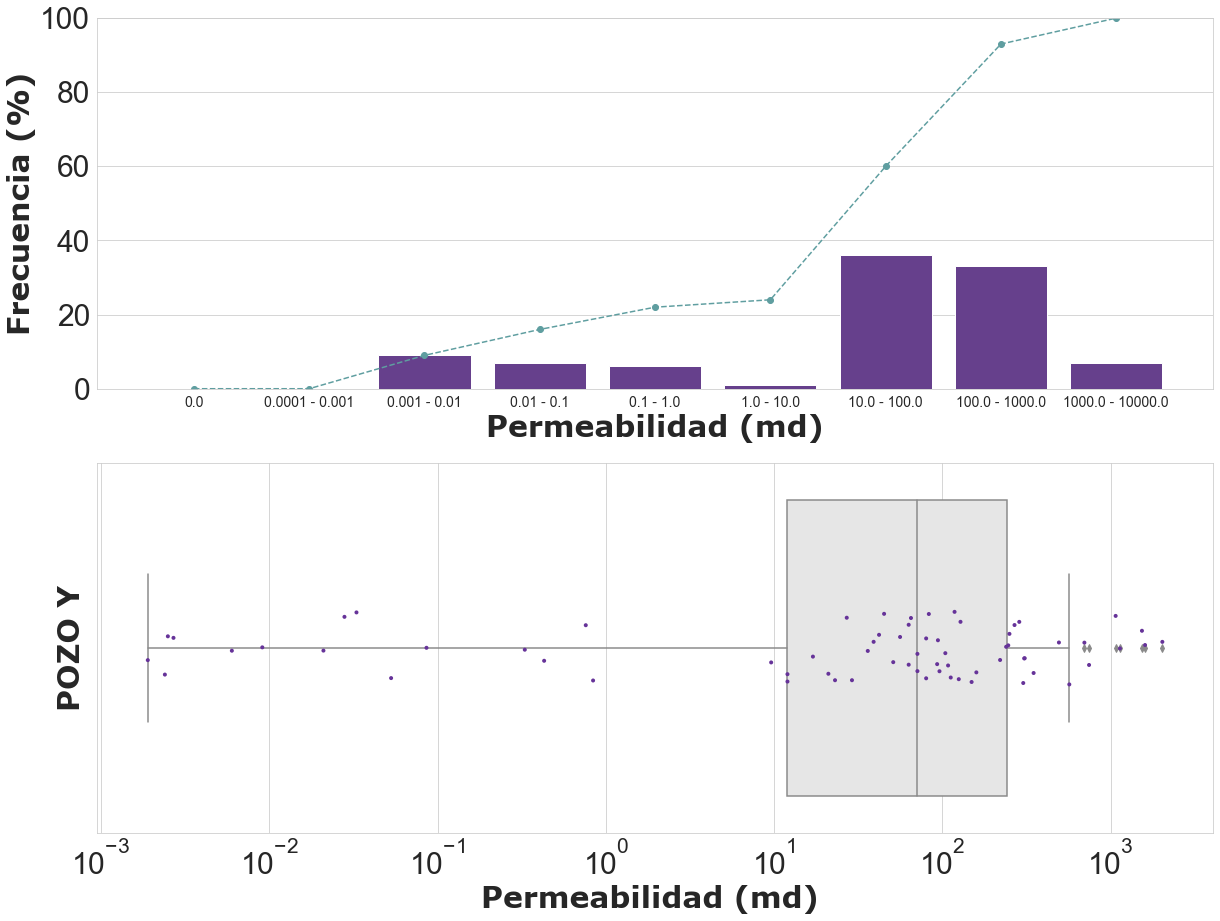

In [116]:
fig, axes=plt.subplots(2,1,figsize=(20,15), sharey=False)

#Grafico para porosidad
sns.set_style("whitegrid")


sns.barplot(x = 'Intervalo', y = '%Frecuencia',data = Permeabilidad,ax=axes[0], color=('#663399'))

# axes[0].set_title("Permeabilidad (md)",fontsize=30, y=1.03, fontfamily='verdana',fontweight ='bold', x=1.1)
axes[0].set_xlabel("Permeabilidad (md)",fontsize=30, fontfamily='verdana',fontweight ='bold')
axes[0].set_ylabel("Frecuencia (%)",fontsize=30, fontfamily='verdana',fontweight ='bold' )
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 0, size = 14)
axes[0].set_ylim(0,100)

axes[0].set_yticklabels([0,20,40,60,80,100],rotation = 0, size = 30)



axes[0].plot('%Frecuencia Acum.',data = Permeabilidad,linestyle="--", marker="o", color='cadetblue')

plt.ylim(0,100)

sns.boxplot(x='K @ NMS (md)',data=basicos_pozo_y, ax=axes[1],color=".9")
sns.stripplot(data=basicos_pozo_y,x='K @ NMS (md)', size=4, ax=axes[1], color='#663399')
axes[1].set_xlabel("Permeabilidad (md) ",fontsize=30, fontfamily='verdana',fontweight ='bold', size=30)
axes[1].set_ylabel("POZO Y",fontsize=30, fontfamily='verdana',fontweight ='bold' )
plt.xscale("log")
# axes[1].set_xlim(0,20)


plt.xticks(size=30)
plt.yticks(size=20)

plt.savefig('Permeabilidad_POZO_Y.png')

plt.show()



<ipython-input-123-fb3875862496>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels([0,20,40,60,80,100],rotation = 0, size = 20)


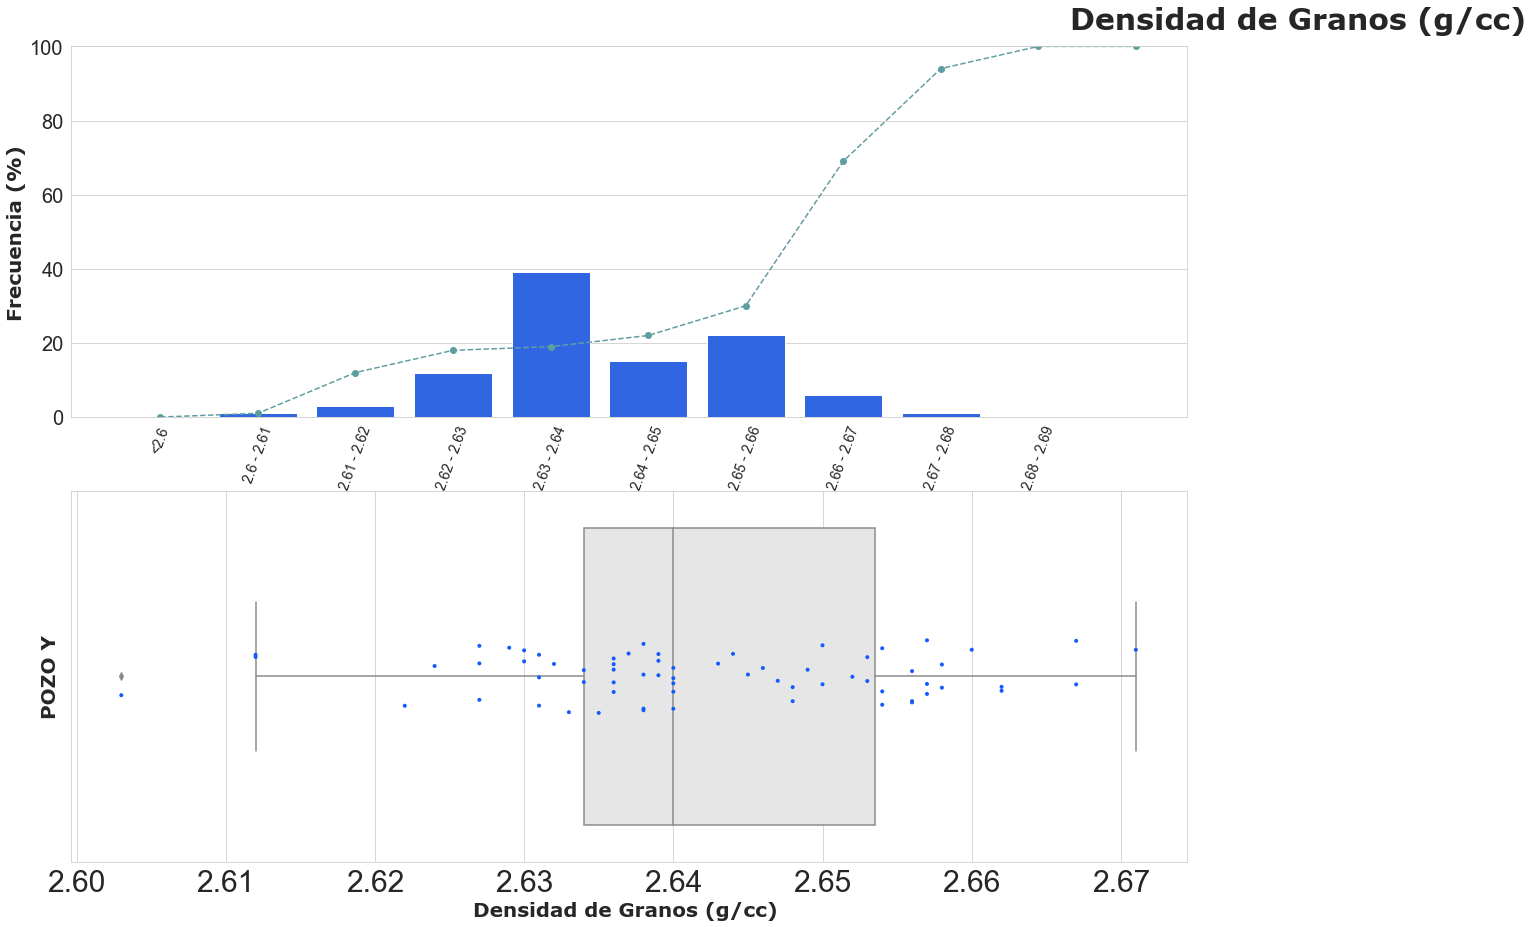

In [123]:
fig, axes=plt.subplots(2,1,figsize=(20,15), sharey=False)

#Grafico para porosidad
sns.set_style("whitegrid")




sns.barplot(x = 'Intervalo', y = '%Frecuencia',data = Densidad,ax=axes[0], color=('#145aff'))

axes[0].set_title("Densidad de Granos (g/cc)",fontsize=30, y=1.03, fontfamily='verdana',fontweight ='bold', x=1.1)
axes[0].set_xlabel("Densidad de Granos (g/cc)",fontsize=25, fontfamily='verdana',fontweight ='bold')
axes[0].set_ylabel("Frecuencia (%)",fontsize=20, fontfamily='verdana',fontweight ='bold' )
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 70, size = 14)
axes[0].set_ylim(0,100)

axes[0].set_yticklabels([0,20,40,60,80,100],rotation = 0, size = 20)



axes[0].plot('%Frecuencia Acum.',data = Porosidad,linestyle="--", marker="o", color='cadetblue')



sns.boxplot(x='Densidad de Granos (g/cc)',data=basicos_pozo_y, ax=axes[1],color=".9")
sns.stripplot(data=basicos_pozo_y,x='Densidad de Granos (g/cc)', size=4, ax=axes[1], color='#145aff')
axes[1].set_xlabel("Densidad de Granos (g/cc) ",fontsize=25, fontfamily='verdana',fontweight ='bold', size=20)
axes[1].set_ylabel("POZO Y",fontsize=20, fontfamily='verdana',fontweight ='bold' )




plt.xticks(size=30)
plt.yticks(size=20)

plt.savefig('DensidadPozo_y.png')

plt.show()